# 1. Model & Tahmin (CART)

In [73]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from skompiler import skompile

from warnings import filterwarnings
filterwarnings('ignore')

In [74]:
diabetes = pd.read_csv("diabetes.csv")

df = diabetes.copy()

df = df.dropna()

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [76]:
df.shape

(768, 9)

In [77]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

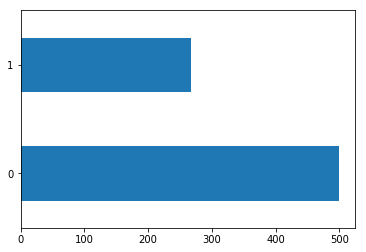

In [78]:
df["Outcome"].value_counts().plot.barh();

In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [80]:
y = df["Outcome"]

y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [81]:
X = df.drop(["Outcome"], axis = 1)

# X = df["Pregnancies"]

X = pd.DataFrame(X)

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [83]:
cart = DecisionTreeClassifier()

cart_model = cart.fit(X_train, y_train)

cart_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [84]:
skompile(cart_model.predict).to("python/code")

'((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else\n    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1\n    ] <= 111.5 else ((0 if x[5] <= 32.59999942779541 else 1) if x[2] <= \n    65.0 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (0 if x[6] <= \n    0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else 0) if x[0] <=\n    4.5 else 0 if x[3] <= 40.5 else 1) if x[5] <= 49.10000038146973 else 1) if\n    x[1] <= 127.5 else 1 if x[2] <= 56.0 else (0 if x[7] <= 27.5 else 0 if \n    x[3] <= 14.5 else 1) if x[5] <= 30.300000190734863 else 1 if x[5] <= \n    32.000000953674316 else ((0 if x[5] <= 33.75 else 1) if x[0] <= 0.5 else\n    1 if x[5] <= 32.45000076293945 else 0) if x[2] <= 85.0 else 1) if x[7] <=\n    28.5 else (1 if x[7] <= 29.5 else (0 if x[2] <= 89.0 else 1) if x[5] <=\n    9.649999618530273 else 0 if x[1] <= 133.0 else (1 if x[2] <= 73.0 else \n    0) if x[1] <= 135.0 else 0) if x[5] <= 26.949999809265137 else (

In [85]:
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((0 if x[5] <= 32.59999942779541 else 1) if x[2] <= 
    65.0 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (0 if x[6] <= 
    0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else 0) if x[0] <=
    4.5 else 0 if x[3] <= 40.5 else 1) if x[5] <= 49.10000038146973 else 1) if
    x[1] <= 127.5 else 1 if x[2] <= 56.0 else (0 if x[7] <= 27.5 else 0 if 
    x[3] <= 14.5 else 1) if x[5] <= 30.300000190734863 else 1 if x[5] <= 
    32.000000953674316 else ((0 if x[5] <= 33.75 else 1) if x[0] <= 0.5 else
    1 if x[5] <= 32.45000076293945 else 0) if x[2] <= 85.0 else 1) if x[7] <=
    28.5 else (1 if x[7] <= 29.5 else (0 if x[2] <= 89.0 else 1) if x[5] <=
    9.649999618530273 else 0 if x[1] <= 133.0 else (1 if x[2] <= 73.0 else 
    0) if x[1] <= 135.0 else 0) if x[5] <= 26.949999809265137 else (1 if x[
    1

In [86]:
cart = DecisionTreeClassifier(max_depth = 2)

cart_model = cart.fit(X_train, y_train)

cart_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [87]:
print(skompile(cart_model.predict).to("python/code"))

((0 if x[7] <= 28.5 else 0) if x[1] <= 154.5 else 1 if x[5] <= 
    28.700000762939453 else 1)



In [88]:
x = [3]

((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

0

In [89]:
x = [9]

((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [90]:
y_pred = cart_model.predict(X_test)

accuracy_score(y_test, y_pred)

0.7186147186147186

In [91]:
cart = DecisionTreeClassifier()

cart_model = cart.fit(X_train, y_train)

cart_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [92]:
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((1 if x[1] <= 123.0 else 0) if x[5] <= 
    37.39999961853027 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (
    0 if x[6] <= 0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else
    0) if x[0] <= 4.5 else 0 if x[3] <= 40.5 else 1) if x[5] <= 
    49.10000038146973 else 1) if x[1] <= 127.5 else 1 if x[2] <= 56.0 else 
    (0 if x[7] <= 27.5 else 1 if x[6] <= 0.32649999111890793 else 0) if x[5
    ] <= 30.300000190734863 else 1 if x[5] <= 32.000000953674316 else ((0 if
    x[5] <= 33.75 else 1) if x[0] <= 0.5 else 1 if x[5] <= 
    32.45000076293945 else 0) if x[2] <= 85.0 else 1) if x[7] <= 28.5 else 
    (1 if x[7] <= 29.5 else (0 if x[1] <= 133.0 else (1 if x[4] <= 30.0 else
    0) if x[1] <= 135.0 else 0) if x[2] <= 94.0 else 1 if x[0] <= 9.0 else 
    0) if x[5] <= 26.949999809265137 else (1 if

In [93]:
x = [9]

(((0 if x[0] <= 0.5 else 0 if x[0] <= 1.5 else 0) if x[0] <= 2.5 else (0 if
    x[0] <= 3.5 else 0) if x[0] <= 4.5 else 0 if x[0] <= 5.5 else 0) if x[0
    ] <= 6.5 else (((1 if x[0] <= 7.5 else 1) if x[0] <= 8.5 else 1) if x[0
    ] <= 9.5 else (0 if x[0] <= 10.5 else 0) if x[0] <= 11.5 else 0 if x[0] <=
    12.5 else 0) if x[0] <= 13.5 else 1)

1

In [94]:
x = [0]

(((0 if x[0] <= 0.5 else 0 if x[0] <= 1.5 else 0) if x[0] <= 2.5 else (0 if
    x[0] <= 3.5 else 0) if x[0] <= 4.5 else 0 if x[0] <= 5.5 else 0) if x[0
    ] <= 6.5 else (((1 if x[0] <= 7.5 else 1) if x[0] <= 8.5 else 1) if x[0
    ] <= 9.5 else (0 if x[0] <= 10.5 else 0) if x[0] <= 11.5 else 0 if x[0] <=
    12.5 else 0) if x[0] <= 13.5 else 1)

0

In [95]:
y_pred = cart_model.predict(X_test)

accuracy_score(y_test, y_pred)

0.7056277056277056

-----------

# 2. Model Doğrulama / Model Tuning (CART)

In [96]:
cart_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [97]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50))}

In [98]:
cart = tree.DecisionTreeClassifier()

cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)

cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 3396 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:    3.7s finished


In [99]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 19}

In [100]:
# Final Modeli

cart = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 19)

cart_tuned = cart.fit(X_train, y_train)

In [101]:
y_pred = cart_tuned.predict(X_test)

accuracy_score(y_test, y_pred)

0.7532467532467533

----------